In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
year = np.array([2017, 2018])
profit = np.array([0, 0])

In [2]:
x = [10,11,12,13,14,15,16]
y = [70,122,144,152,174,196,202]

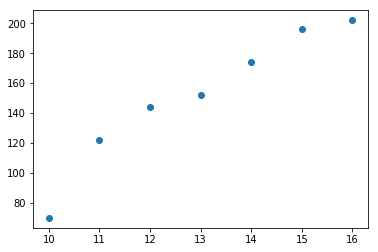

In [3]:
plt.scatter(x, y)

In [6]:
m = len(x)
sum_x2 = sum([n**2 for n in x])
sum_y = sum(y)
sum_x = sum(x)
sum_xy = sum([xi*yi for xi, yi in zip(x, y)])
a = (sum_x2 * sum_y - sum_x*sum_xy) / ((m + 1) * sum_x2 - sum_x**2)
b = ((m + 1) * sum_xy - sum_x * sum_y) / ((m + 1) * sum_x2 - sum_x**2)
print("a=", a,",b=", b)

a= -16.029850746268657 ,b= 13.057569296375267


In [7]:
y_2017 = 17 * b + a
y_2018 = 18 * b + a
print('1707004539')
print('马骕駸')
print("预测2017年利润:", y_2017, "万元")
print("预测2018年利润:", y_2018, "万元")

1707004539
马骕駸
预测2017年利润: 205.94882729211088 万元
预测2018年利润: 219.00639658848613 万元


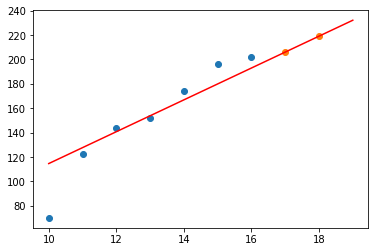

In [8]:
num = list(range(10,20))
y_pred = [n*b + a for n in num]
plt.scatter(x, y)
plt.scatter([17, 18], [y_2017, y_2018])
plt.plot(num, y_pred, 'r')

In [23]:
def polyfunction(x, y, n=2):
    matrix = []
    m = len(x)
    for i in range(n+1):
        vector = []
        for j in range(i, i + n + 1):
            if i == 0  and j == 0:
                vector.append(m)
            else:
                sum_xn = sum([xi**j for xi in x])
                vector.append(sum_xn)
        vector.append(sum([(xi**i)*yi  for xi, yi in zip(x, y)]))
        matrix.append(vector)
    return matrix

def solve(matrix):
    for j in range(len(matrix)): # 主对角先元素：(m,m)
        if matrix[j][j] == 0: # 主对角先元素不为0
            break
    # 消去主对角线以下的元素
    for r in range(j+1, len(matrix)):
        mult = matrix[r][j] / matrix[j][j]
        # 对该行做减法
        for i in range(len(matrix[0])):
            matrix[r][i] = matrix[r][i] - mult * matrix[j][i]
    # 回代
    x = [i*0+1 for i in list(range(len(matrix[0])-1))]
    b = []
    for i in range(len(matrix)):
        b.append(matrix[i][len(matrix)])
    for i in reversed(range(len(matrix))):
        for j in range(i+1, len(matrix)):
            b[i] = b[i] - matrix[i][j] * x[j]
        x[i] = b[i] /matrix[i][i]

    for i in range(len(x)):
        print('x' + str(i+1)+"=", x[i])
    return x

def predict(a, x_pred):
    y_pred = 0
    for i in range(len(a)):
        y_pred += a[i]*x_pred**i
    return y_pred

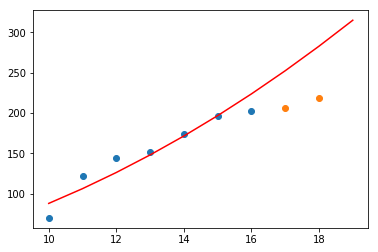

In [25]:
plt.scatter(x, y)
plt.scatter([17, 18], [y_2017, y_2018])
num = list(range(10,20))
y_pred = [predict(a, n) for n in num]
plt.plot(num, y_pred, 'r')